Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike= pd.read_csv(r"E:\Utech Academi\ML\Project2\Mini Project 2 - Regression (Bike Sharing Demand)\train.csv")
bike.head()
                  

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

# Checking numbers of rows & columns

In [3]:
bike.shape

(10886, 12)

# Checking dataset info 
*there is not any missing values
*showing data types


In [4]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
bike.iloc[[10,20,25]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36
20,2011-01-01 20:00:00,1,0,0,2,16.40,20.455,87,16.9979,11,25,36
25,2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17


In [8]:
bike.loc[ :,['holiday','weather','windspeed']]

,holiday,weather,windspeed
0,0,1,0.0000
1,0,1,0.0000
2,0,1,0.0000
3,0,1,0.0000
4,0,1,0.0000
...,...,...,...
10881,0,1,26.0027
10882,0,1,15.0013
10883,0,1,15.0013
10884,0,1,6.0032


In [9]:
bike['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
636      1
620      1
678      1
694      1
839      1
Name: registered, Length: 731, dtype: int64

In [10]:
pd.crosstab( bike.holiday, bike.registered )

registered,0,1,2,3,4,5,6,7,8,9,...,802,803,806,807,811,812,833,839,857,886
holiday,,,,,,,,,,,,,,,,,,,,,
0,15,134,148,186,186,171,150,126,111,110,...,1,1,1,1,1,2,1,1,2,1
1,0,1,2,9,4,6,5,0,3,4,...,0,0,0,0,0,0,0,0,0,0


In [11]:
bike.groupby('holiday')['registered'].sum()

holiday
0    1650704
1      42637
Name: registered, dtype: int64

# Finding out the correlation between the features

In [12]:
corr = bike.corr()
corr.shape

(11, 11)

# Plotting the heatmap of correlation between features

<AxesSubplot:>

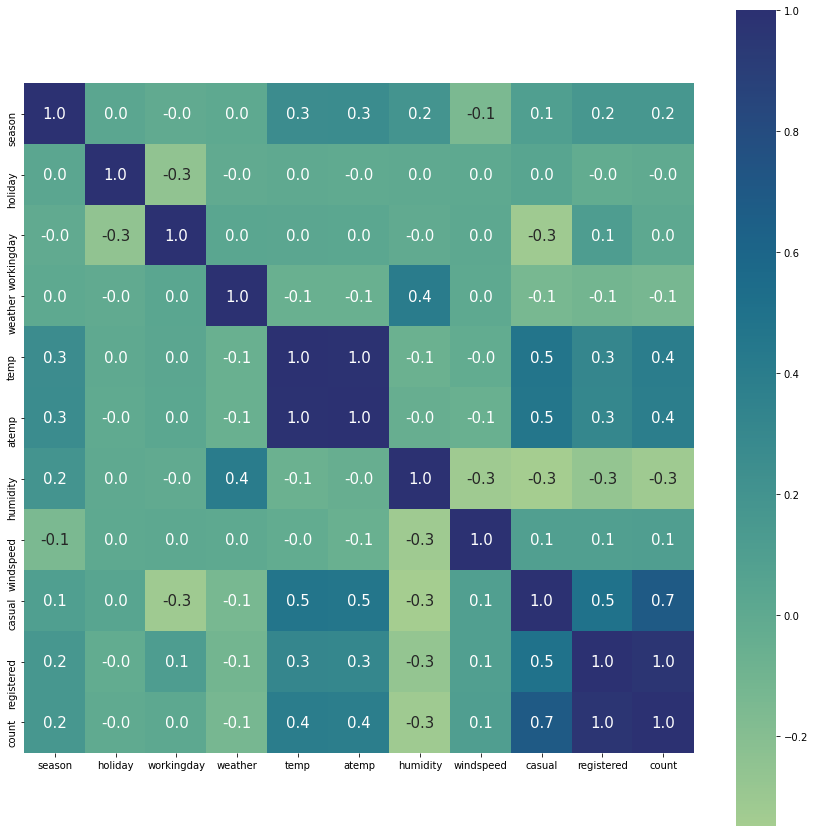

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True,linecolor='white', annot_kws={'size':15}, cmap="crest")

In [14]:
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


# Simple Linear Regression

In [15]:
X = bike[['registered']].values
Y = bike['count'].values

In [16]:
X

array([[ 13],
       [ 32],
       [ 27],
       ...,
       [164],
       [117],
       [ 84]], dtype=int64)

In [17]:
Y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [20]:
print(X_train)

[[230]
 [382]
 [ 60]
 ...
 [265]
 [315]
 [ 58]]


In [21]:
X_train.shape

(8708, 1)

In [22]:
print(X_test)

[[382]
 [610]
 [ 13]
 ...
 [237]
 [189]
 [  2]]


In [23]:
print(y_train)

[451 473  78 ... 395 335  58]


In [24]:
print(y_test)

[417 638  14 ... 337 237   7]


In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
regressor.intercept_

10.232891603266978

In [27]:
regressor.coef_

array([1.16448954])

In [28]:
from sklearn import metrics

In [29]:
y_pred = regressor.predict(X_train)

In [30]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9433594451724616
MAE: 26.331424555336984
MSE: 1829.62822279631
RMSE: 42.774153677148426


# Multiple Linear Regression

In [31]:
bike.datetime.unique()

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [32]:
bike.drop("datetime", axis=1,inplace=True)

In [33]:
X = bike.iloc[:, 1:-3].values
Y = bike.iloc[:, -1].values

In [34]:
X

array([[ 0.    ,  0.    ,  1.    , ..., 14.395 , 81.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 13.635 , 80.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 13.635 , 80.    ,  0.    ],
       ...,
       [ 0.    ,  1.    ,  1.    , ..., 15.91  , 61.    , 15.0013],
       [ 0.    ,  1.    ,  1.    , ..., 17.425 , 61.    ,  6.0032],
       [ 0.    ,  1.    ,  1.    , ..., 16.665 , 66.    ,  8.9981]])

In [35]:
Y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 26)

In [37]:
from sklearn.linear_model import LinearRegression
bmlr = LinearRegression()
bmlr.fit(X_train, y_train)

LinearRegression()

In [38]:
print (X_train)

[[ 0.      0.      1.     ... 31.06   44.      6.0032]
 [ 0.      1.      1.     ... 31.06   43.     12.998 ]
 [ 0.      1.      2.     ... 15.15   57.     19.9995]
 ...
 [ 0.      0.      1.     ... 29.545  73.     12.998 ]
 [ 0.      1.      1.     ... 25.76   52.     19.0012]
 [ 0.      1.      1.     ... 12.88   52.     15.0013]]


In [39]:
print (X_test)

[[ 0.      1.      1.     ... 35.605  58.     15.0013]
 [ 0.      1.      1.     ... 17.425  46.     15.0013]
 [ 0.      1.      1.     ... 26.515  83.     11.0014]
 ...
 [ 0.      0.      1.     ... 19.695  46.      0.    ]
 [ 0.      0.      2.     ... 15.91   45.     12.998 ]
 [ 0.      1.      1.     ... 12.88   52.      6.0032]]


In [40]:
bmlr.intercept_

163.80648863708805

In [41]:
bmlr.coef_

array([-0.26145556,  0.90719598,  2.6704852 ,  1.80706811,  6.36727563,
       -2.78460459,  0.54705281])

In [42]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9433594451724616
MAE: 26.331424555336984
MSE: 1829.62822279631
RMSE: 42.774153677148426


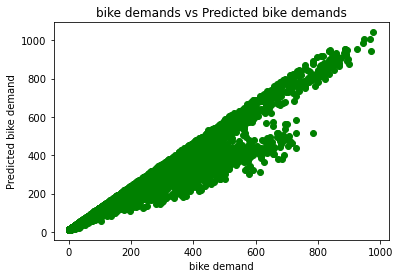

In [43]:
plt.scatter(y_train, y_pred, color='Green')
plt.xlabel("bike demand")
plt.ylabel("Predicted bike demand")
plt.title("bike demands vs Predicted bike demands")
plt.show()

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.20211299954065226

In [46]:
knn.score(X_test, y_test)

0.011937557392102846

In [47]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

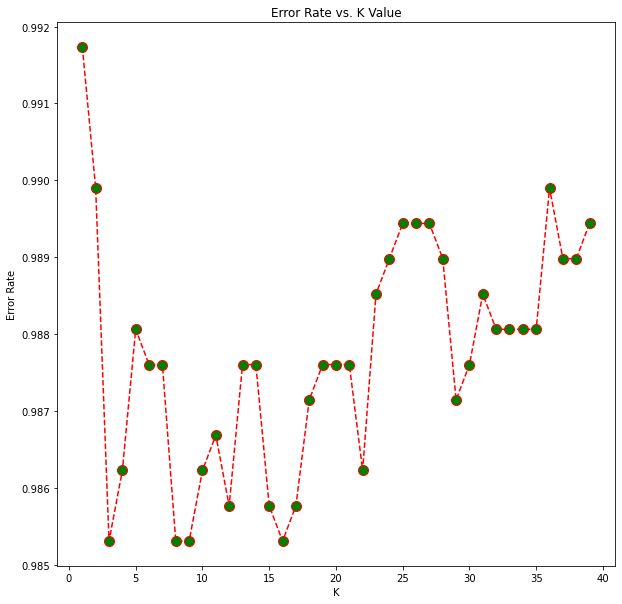

In [48]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='Green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.32441433164905836

# Decision Tree

In [51]:
X = bike.iloc[:,1:-3]
y = bike['count']
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,0,0,1,9.84,14.395,81,0.0000
1,0,0,1,9.02,13.635,80,0.0000
2,0,0,1,9.02,13.635,80,0.0000
3,0,0,1,9.84,14.395,75,0.0000
4,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027
10882,0,1,1,14.76,17.425,57,15.0013
10883,0,1,1,13.94,15.910,61,15.0013
10884,0,1,1,13.94,17.425,61,6.0032


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=10)

In [54]:
y_pred=regressor.predict([[3,20,18.5,90,56,4,32]])
y_pred

array([527.])

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor(n_estimators = 150, random_state = 10)
rgr.fit(X,y)

RandomForestRegressor(n_estimators=150, random_state=10)

In [56]:
y_pred=rgr.predict([[3,20,18.5,90,56,4,32]])
y_pred

array([334.43466667])

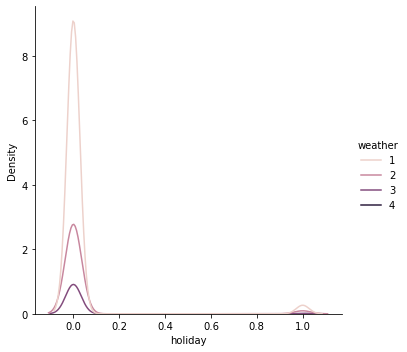

In [57]:
sns.displot(bike, x="holiday", hue='weather',kind="kde")

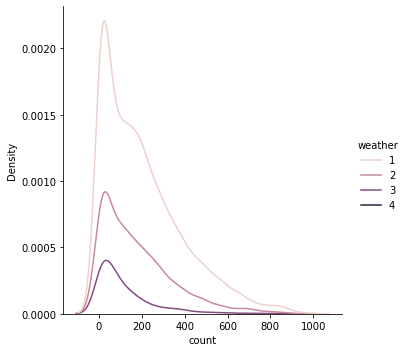

In [58]:
sns.displot(bike, x='count', hue='weather',kind="kde")

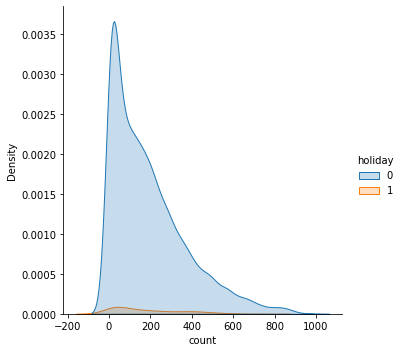

In [59]:
sns.displot(bike, x='count', hue='holiday',kind="kde", fill= True)